In [1]:
%matplotlib inline
from functools import reduce

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
ACTIONS = (0, 1) # left, right 

In [3]:
STATES = (0, 1) # nonterminal, terminal

In [4]:
def pi() -> int: # action
    return 0

In [5]:
# P(action = left|nonterminal) = 1
# P(action = right|nonterminal) = 0
pi_table = { 
    0: 1,
    1: 0
}

In [6]:
# P(action = left|nonterminal) = 0.5
# P(action = right|nonterminal) = 0.5
b_table = { 
    0: 0.5,
    1: 0.5
}

In [7]:
def b() -> int: # action
    if np.random.uniform() < 0.5:
        return 0
    return 1

In [8]:
def get_episode():
    actions = []
    state = 0
    r = 0
    while state != 1:
        action = b()
        actions.append(action)
        if action == 1: # right, deterministically go to terminal state 
            state = 1
        else: # left
            if np.random.uniform() < 0.1:
                state = 1
                r = 1
            else:
                state = 0
        
    return actions, r 

In [9]:
# first-visit monte carlo

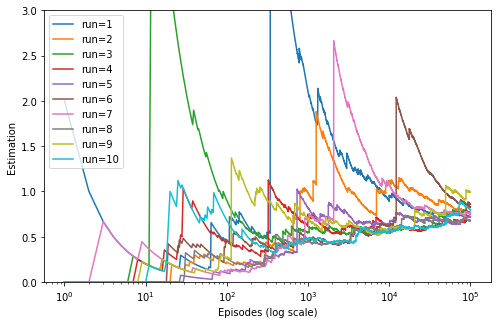

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))

n_iter = 10
n_episodes = 100000
for i in range(1, n_iter + 1):
    estimations = np.zeros(n_episodes)
    for j in range(n_episodes): # episodes
        actions, r = get_episode()
        estimations[j] = r * np.multiply.reduce([pi_table[a] / b_table[a] for a in actions])
        
    estimations = np.add.accumulate(estimations) / np.arange(1, n_episodes + 1)    
    plt.plot(np.arange(1, n_episodes + 1), estimations, label='run=' + str(i))
    plt.ylabel('Estimation')
    plt.xlabel('Episodes (log scale)')
    plt.ylim(0, 3)
    plt.xscale('log')
plt.legend();